In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
housing_data = pd.read_csv("housing.csv")
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [23]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [24]:
housing_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [25]:
## Unique ocean proximities
unique_values = housing_data['ocean_proximity'].unique()
print(unique_values)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


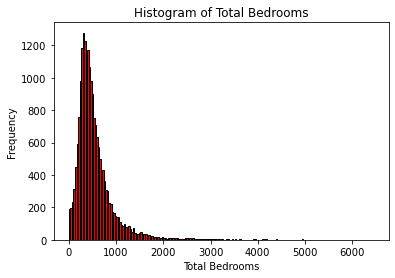

In [27]:
## Histogram of Total Bedrooms
import matplotlib.pyplot as plt
total_bedrooms_column = housing_data['total_bedrooms']
plt.hist(total_bedrooms_column, bins=200, edgecolor='black', color = "red")  # Adjust the number of bins as needed
plt.xlabel('Total Bedrooms')
plt.ylabel('Frequency')
plt.title('Histogram of Total Bedrooms')
plt.show()

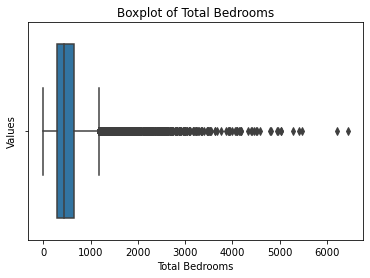

In [31]:
## Boxplot of total bedrooms
sns.boxplot(x=total_bedrooms_column)
plt.xlabel('Total Bedrooms')
plt.ylabel('Values')
plt.title('Boxplot of Total Bedrooms')
plt.show()

In [62]:
## Replacing missing total bedroom values with median
target_total_bedrooms = 'total_bedrooms'
total_bedrooms_variable = housing_data[target_total_bedrooms]
median_value = total_bedrooms_variable.median()
median_value
new_total_bed_variable = np.where(housing_data["total_bedrooms"].isnull(),
                                 435,
                                 housing_data["total_bedrooms"])
housing_data["total_bedrooms"] = new_total_bed_variable
housing_data["total_bedrooms"].describe()

count    20640.000000
mean       536.838857
std        419.391878
min          1.000000
25%        297.000000
50%        435.000000
75%        643.250000
max       6445.000000
Name: total_bedrooms, dtype: float64

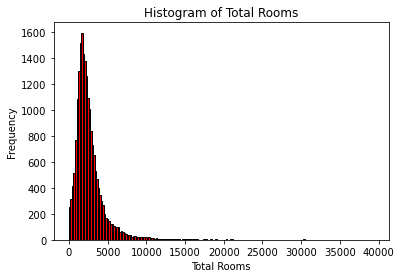

In [61]:
## Histogram of Total Rooms
total_rooms_column = housing_data['total_rooms']
plt.hist(total_rooms_column, bins=200, edgecolor='black', color = "red")  # Adjust the number of bins as needed
plt.xlabel('Total Rooms')
plt.ylabel('Frequency')
plt.title('Histogram of Total Rooms')
plt.show()

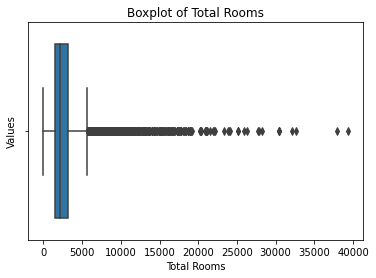

In [32]:
## Boxplot of Total Rooms
sns.boxplot(x=total_rooms_column)
plt.xlabel('Total Rooms')
plt.ylabel('Values')
plt.title('Boxplot of Total Rooms')
plt.show()

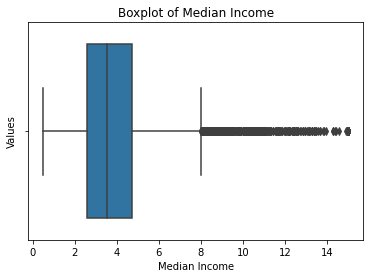

In [34]:
## Box Plot of Median Income
median_income_column = housing_data['median_income']
sns.boxplot(x=median_income_column)
plt.xlabel('Median Income')
plt.ylabel('Values')
plt.title('Boxplot of Median Income')
plt.show()

In [60]:
## Sort by ocean proximity
mean_house_values = housing_data.groupby('ocean_proximity')['median_house_value'].mean()
result_table = pd.DataFrame({'ocean_proximity': mean_house_values.index, 'avg_median_value': mean_house_values.values})
print(result_table)

  ocean_proximity  avg_median_value
0       <1H OCEAN     240084.285464
1          INLAND     124805.392001
2          ISLAND     380440.000000
3        NEAR BAY     259212.311790
4      NEAR OCEAN     249433.977427


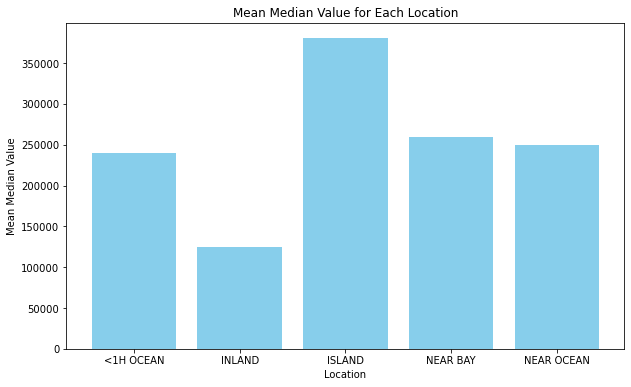

In [46]:
## Bar graph of average median value by location
plt.figure(figsize=(10, 6))
plt.bar(result_table['ocean_proximity'], result_table['avg_median_value'], color='skyblue')
plt.xlabel('Location')
plt.ylabel('Average Median Value')
plt.title('Average Median Value for Each Location')
plt.show()

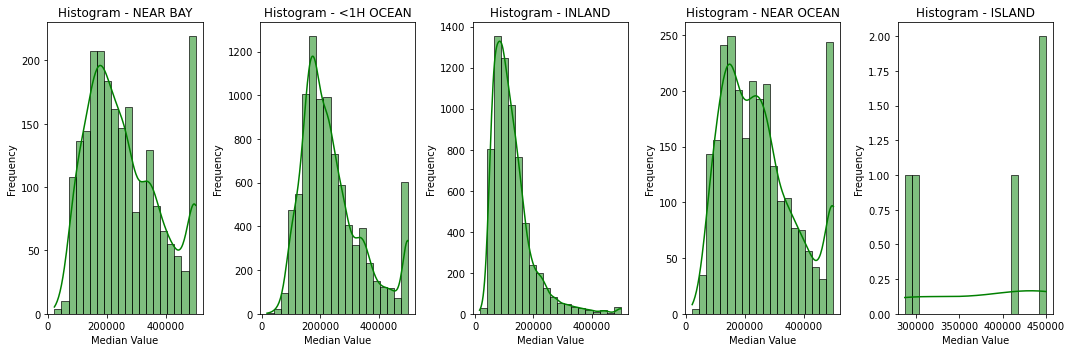

In [57]:
## Histogram of median value sorted by ocean proximity
unique_locations = housing_data['ocean_proximity'].unique()
fig, axes = plt.subplots(nrows=1, ncols=len(unique_locations), figsize=(15, 5))
for i, location in enumerate(unique_locations):
    data_subset = housing_data[housing_data['ocean_proximity'] == location]['median_house_value']
    sns.histplot(data_subset, bins=20, kde=True, color='green', edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Histogram - {location}')
    axes[i].set_xlabel('Median Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

In [66]:
## Correlation Matrix of Three Variables
selected_columns = ['median_house_value', 'median_income', 'total_bedrooms']
selected_data = housing_data[selected_columns]
correlation_matrix = selected_data.corr()
print(correlation_matrix)

                    median_house_value  median_income  total_bedrooms
median_house_value            1.000000       0.688075        0.049457
median_income                 0.688075       1.000000       -0.007617
total_bedrooms                0.049457      -0.007617        1.000000
